In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

from hw10_utils import draw_ellipse, get_points_and_transformation, get_ellipse

## Exercise 10 - Non-linear least-squares fitting

In this exercise we will apply the same ideas that we have explored in class to solve a geometrical problem: to find
a parametric description of a non-linear shape—an ellipsis—given noisy measurements of it.

### Problem

We want to estimate the parameters of an ellipse, given a number of points that lie approximately at its perimeter.

### General approach
- Find a transformation that maps points from ellipse to unit circle
- Minimize euclidean distance from points to unit circle
- Apply inverse transformation

## Data Generation and Visualization

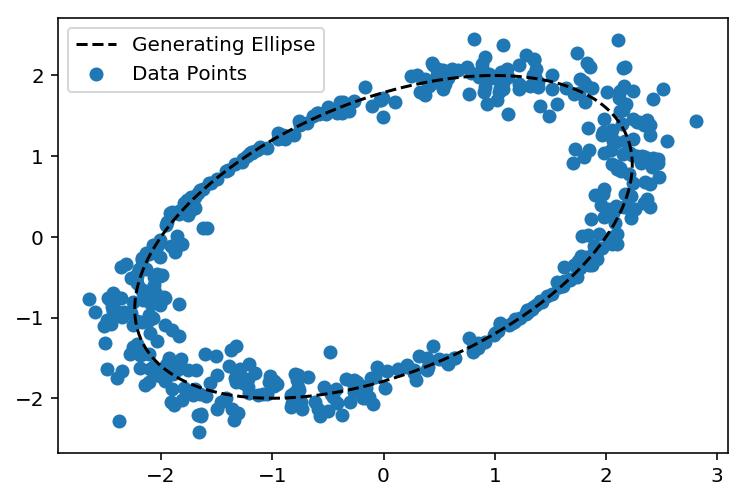

In [2]:
# Plot the noisy data
noisy_ellipse, B = get_points_and_transformation()
plt.scatter(noisy_ellipse[:, 0], noisy_ellipse[:, 1], label='Data Points')

# Plot the original ellipse from which the data was generated
ground_truth_ellipse = get_ellipse(B)
plt.plot(ground_truth_ellipse[:,0], ground_truth_ellipse[:,1], 'k--', label='Generating Ellipse')
plt.legend();

In [3]:
# Augment (x,y) to (x,y,1)
S = noisy_ellipse.T
S = np.vstack((S, np.ones((1,S.shape[1]))))

## Non-linear Least Square Optimization for Ellipse Fitting

Algebraic distance to ellipse is defined as below, however, it can not be used for non-linear least square optimization. We define Euclidean distance to ellipse and minimize geometric loss with non-linear least square optimization for regression.

\begin{align}
\vec{u}^{C} = [u_{i}, v_{i}, 1]^{T}
\end{align}

\begin{align}
d_{a}(X,\vec{u}^{C}) = au_{i}^2 + bu_{i}v_{i} + cv_{i}^2 + du_{i} + ev_{i} + f
\end{align}

Affine transformation $T_{a}$ that maps data points on ellipse to unit circle is defined as;

\begin{align}
T_{a} = \left[ {\begin{array}{cc}
   t_{1} & t_{2} & t_{3} \\
   t_{4} & t_{5} & t_{6} \\
   0 & 0 & 1 \\
  \end{array} } \right]
\end{align}

Our model parameters,  $X = [t_{1}, t_{2}, t_{3}, t_{4}, t_{5}, t_{6}]$ and we optimize over these parameters to find transformation $T_{a}$ and finally fitting ellipse.

Data point $\vec{u}$ is defined is as follows;
\begin{align}
\vec{u} = [x, y, 1]^{T}
\end{align}

\begin{align}
\vec{u}_{a} = T_{a}^{-1}\vec{u} = [u_{a}, v_{a}, 1]
\end{align}

\begin{align}
\vec{u}_{a}^{C} = [u_{a}, v_{a}, \sqrt{u_{a}^2 + v_{a}^2}]
\end{align}

We define;
\begin{align}
C = \sqrt{u_{a}^2 + v_{a}^2} = \sqrt{(t_{1}x + t_{2}y + t_{3})^2 + (t_{4}x + t_{5}y + t_{6})^2}
\end{align}

Euclidean distance to ellipse is as follows;
\begin{align}
d_{e}(X,\vec{u}_{a}) = d_{e}(\vec{u}_{a}^{C}, \vec{u}_{a}) = \sqrt{u_{a}^2 + v_{a}^2} - 1 = C - 1
\end{align}

Jacobian, $J$, for model parameters $X$ is defined as follows;

\begin{align}
J = \left[ {\begin{array}{cc}
   \frac{\partial d_{e}(X,{}_{1}\vec{u}_{a})}{\partial t_{1}} & \frac{\partial d_{e}(X,{}_{1}\vec{u}_{a})}{\partial t_{2}} & ... & \frac{\partial d_{e}(X,{}_{1}\vec{u}_{a})}{\partial t_{6}} \\
   \frac{\partial d_{e}(X,{}_{2}\vec{u}_{a})}{\partial t_{1}} & \frac{\partial d_{e}(X,{}_{2}\vec{u}_{a})}{\partial t_{2}} & ... & \frac{\partial d_{e}(X,{}_{2}\vec{u}_{a})}{\partial t_{6}} \\
   . & . & ... & . \\
   \frac{\partial d_{e}(X,{}_{n}\vec{u}_{a})}{\partial t_{1}} & \frac{\partial d_{e}(X,{}_{n}\vec{u}_{a})}{\partial t_{2}} & ... & \frac{\partial d_{e}(X,{}_{n}\vec{u}_{a})}{\partial t_{6}} \\
  \end{array} } \right]_{N x 6}
\end{align}

\begin{align}
\frac{\partial d_{e}(X,{}_{1}\vec{u}_{a})}{\partial X} = \frac{\partial C_{1}}{\partial X} 
\end{align}

\begin{align}
\frac{\partial C_{1}}{\partial t_{1}} =\frac{1}{C_{1}} (t_{1}x + t_{2}y + t_{3}) x
\end{align}

\begin{align}
\frac{\partial C_{1}}{\partial t_{2}} =\frac{1}{C_{1}} (t_{1}x + t_{2}y + t_{3}) y
\end{align}

In [ ]:
# S = (3, N)
# Ta = (6,)
def calculate_C(Ta, S):
    """compute scale parameter C, defined as above, of data points"""
    Ta = Ta.reshape((2,3))
    """
    Please fill in the required code here
    """
    return C

# return residual = (N, )
def calculate_residual(Ta, S):
    """compute euclidean distance to unit cirle using calculate_C function"""
    
    """
    Please fill in the required code here
    """
    return residual

# return J = (N, 6)
def calculate_jacobian(Ta, S):
    """compute jacobian of residuals """
    C = calculate_C(Ta, S)
    Ta = np.vstack((Ta.reshape((2,3)),np.array([0,0,1])))
    
    """
    Please fill in the required code here for Jacobian Matrix, J
    """
    return J


## 1. Levenberg-Marquardt Method

Using scipy.least_square for non-linear optimation with defined residual and jacobian functions

In [ ]:
x0 = np.arange(6)
"""
Please fill in the required code here
"""

In [ ]:
x0 = np.arange(6)
x1 = least_squares(calculate_residual, x0, calculate_jacobian, args=([S]))
Ta = np.vstack(((x1.x).reshape(2,3), np.array([0,0,1])))
print(Ta)

In [ ]:
draw_ellipse(S, Ta)

Implement Levenberg-Marquardt optimization step using calculate_residual and calculate_jacobian functions

\begin{align}
F(X) = [d_{e}(X,{}_{1}\vec{u}_{a}), d_{e}(X,{}_{2}\vec{u}_{a}), ..., d_{e}(X,{}_{n}\vec{u}_{a})]
\end{align}

\begin{align}
(J^TJ+\lambda I)dX &= -J^TF(X)
\end{align}

In [ ]:
def norm(v):
    """implement L1 norm"""

    """
    Please fill in the required code here
    """
    
def compute_LVMstep(X, S, lmbda):
    """implement Levenberg-Marquardt optimization step"""

    """
    Please fill in the required code here
    """

def fit_LVM(X, S):
    lmbda = 0.001
    
    for i in range(100):
        update = compute_LVMstep(X, S, lmbda)
        if update is not None:
            X = X + update[0]
            lmbda = update[1]
        else:
            print("Optimization converged")
            return X
    return X

In [ ]:
x2 = fit_LVM(x0, S)

In [ ]:
Ta = np.vstack((x2.reshape(2,3), np.array([0,0,1])))
print(Ta)

In [ ]:
draw_ellipse(S, Ta)

## 2. Gradient Descent

The gradient descent optimization algorithm uses the residuals at each timestep's prediction to compute a new, better estimate of the parameters.

The residuals, in this problem, are given by the squared euclidean distances between the data points and points lying on the actual ellipse that we want to find:

$$
\mathbf{F}(\mathbf{X}) = \sum_i d(x_i, \mathbf{X})^2
$$

The Gradient Descent algorithm estimates via partial derivatives how those residuals change. The gradient is given by:

$$
\nabla \mathbf{F}(\mathbf{X}) =
\left[
\begin{matrix} 
\frac {\partial \mathbf{F}} {\partial X_1} 
\ldots
\frac {\partial \mathbf{F}} {\partial X_n}
\end{matrix}
\right]
$$

The update rule is hence simply taking a small step, given by a learning rate $\lambda$, in the opposite direction of the gradient, or

$$
\mathbf{X}^{t+1} = \mathbf{X}^{t} - \lambda \nabla \mathbf{F}(\mathbf{X^t})
$$

In [ ]:
def calculate_gradient(Ta, S):
    """compute gradient for MSE of residuals, d, using calculate_residual and calculate_jacobian"""
    d = calculate_residual(Ta, S) 
    J = calculate_jacobian(Ta, S)

    """
    Please fill in the required code here
    """
    return grad


def fit_GD(Ta, S):
    """
    Find the transformation Ta that produces the best fit for the samples S,
    using the Gradient Descent algorithm.
    """
    lmbda = 0.0002
    
    for i in range(100):
        grad = calculate_gradient(Ta, S)
        """
        Please fill in the required code here for gradient descent parameter update
        """
        
        if i % 10 == 1:
            print("Loss: ", np.sum(calculate_residual(Ta, S)**2))
    return Ta

In [ ]:
x0 = np.random.uniform(0,1,6) 
x3 = fit_SGD(x0, S)

In [ ]:
Ta = np.vstack((x3.reshape(2,3), np.array([0,0,1])))
print(Ta)

In [ ]:
draw_ellipse(S, Ta)